# TDC 103: Datasets Part 1 - Small Molecules

[Kexin](https://twitter.com/KexinHuang5)

In this tutorial, we will walk through various small molecule datasets provided in TDC!

We assume you have familiarize yourself with the installations, data loaders, and data functions. If not, please visit [TDC 101 Data Loaders](https://github.com/mims-harvard/TDC/blob/master/tutorials/TDC_101_Data_Loader.ipynb) and [TDC 102 Data Functions](https://github.com/mims-harvard/TDC/blob/master/tutorials/TDC_102_Data_Functions.ipynb) first!

TDC has more than 60 datasets in the first release. In this tutorial, we highlight many of them and hopefully will give users a sense of what the TDC covers. We will start with small molecule drugs and go to biologics in the next part of the tutorial. For small molecules, we introduce the dataset in the order of discovery and development pipelines. 

## Small Molecule 

### Target Discovery

The first stage of small molecule drug discovery is target discovery, that is to identify genes for the disease of interest. This is relatively underexplored for ML usage. One way to do it is by modeling it as a prediction problem for gene-disease association (GDA). TDC includes one high quality GDA data [DisGeNET](https://www.disgenet.org/), which curates from UniProt, PsyGeNET, Orphanet, the CGI, CTD (human data), ClinGen, and the Genomics England PanelApp. We also generate disease definitions for disease and amino acid sequence for gene as input features. You can access them via:

In [1]:
from tdc.multi_pred import GDA
data = GDA(name = 'DisGeNET')
data.get_data().head(2)

Downloading...
100%|██████████| 63.9M/63.9M [00:03<00:00, 18.2MiB/s]
Loading...
Done!


,Gene_ID,Gene,Disease_ID,Disease,Y
0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,0.3
1,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0036341,Schizophrenia: Schizophrenia is highly heritab...,0.3


The Gene_ID is the GenBank GeneID and the Disease_ID is the Concept ID from MedGen. We can see the association distribution by:

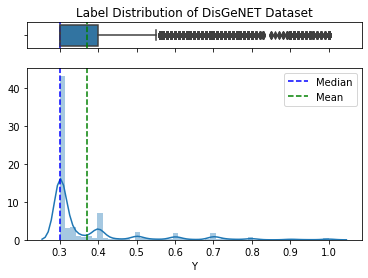

In [2]:
data.label_distribution()

Now, you can build ML models to predict this association. Also, note that another way to phrase it is as a missing link prediction problem in Gene-Disease Association Network, where you can apply recent Graph ML to do interesting predictions. You can obtain the network object of edge list/DGL/PyG format using TDC data functions. For example, we want to include all associations above 0.35 as edges. Then, to obtain DGL object, type:

In [3]:
graph = data.to_graph(threshold = 0.35, format = 'dgl', split = True, frac = [0.7, 0.1, 0.2], seed = 'benchmark', order = 'ascending')
graph['dgl_graph']

The dataset label consists of affinity scores. Binarization using threshold 0.35 is conducted to construct the positive edges in the network. Adjust the threshold by to_graph(threshold = X)
Using backend: pytorch


DGLGraph(num_nodes=9432, num_edges=15484,
         ndata_schemes={}
         edata_schemes={})

In additiont to predicting GDA, there are also research doing target fishing using drug-target interaction dataset.

### Activity

After we found the target, we want to screen a large set of compounds to identify the ones who have high binding affinity or activity to the disease target. The binding affinity is generated via high-throughput screening. There are huge amounts of wet lab data available out there for various disease targets. Instead of including all of them, TDC aims to include assays for disease of current interest. For example, we include a SARS-CoV2 in vitro data from Touret et al.:   

In [4]:
from tdc.single_pred import HTS
data = HTS(name = 'SARSCoV2_Vitro_Touret')
data.get_data().head(2)

Downloading...
100%|██████████| 101k/101k [00:00<00:00, 626kiB/s] 
Loading...
Done!


,Drug_ID,Drug,Y
0,0,CCOC1=CC2=C(C=C1)N=C(S2)S(=O)(=O)N,1
1,1,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C)O)CC[C@@...,1


For HTS, we hope to be a community driven effort, where domain people can point out disease of interests and the corresponding assay data and then we could quickly add it to TDC. This would make TDC reflect the state-of-the-art landscape of diseases targets and allow machine learning scientists to build models to aid the development of that disease. If you have any idea, please don't hesitate to [contact us](mailto:kexinhuang@hsph.harvard.edu). 

While HTS is restricted to one target protein, drug-target interaction (DTI) dataset combines many assays. One huge advantage of it is that a ML model learned on HTS dataset can only do prediction on one protein whereas a ML model learned on DTI dataset learns both disease proteins and drugs chemicals and thus can generalize to unseen drugs/targets. TDC includes several DTI datasets, including the largest BindingDB dataset. Note that BindingDB is the collection of many assays. Since different assays use different units, TDC separates them as separate datasets. Specifically, it has four datasets with Kd, IC50, EC50, Ki as the units. We load Kd here as an example for the sake of tutorial example (although IC50 has much larger number of data points, ~1Million):

In [5]:
from tdc.multi_pred import DTI
data = DTI(name = 'BindingDB_Kd', print_stats = True)

Downloading...
100%|██████████| 54.4M/54.4M [00:03<00:00, 16.5MiB/s]
Loading...
--- Dataset Statistics ---
10665 unique drugs.
1413 unique targets.
66444 drug-target pairs.
--------------------------
Done!


Another way to find compound that has affinity to disease target is through molecule generation. Molecule generation model is roughly defined as a generative model that generates new molecule structure that achieves some desirable properties such as high binding affinity to a target. There are mainly three diagrams: 1) goal-oriented learning where the ML model generates new molecule individually that achieves high score through oracles; 2) distribution learning aims to learn the distribution of the training set and generates molecule from this learnt distribution; 3) pair molecule generation formulates generation as a translation problem where it is to translate from drug X to Y where X and Y are similar but X has low score and Y has high score. 

The datasets for 1 and 2 are any compound library. We provide several compound libraries and oracles in TDC. For compound library, we have MOSES, ChEMBL and ZINC. For example, to load MOSES:

In [6]:
from tdc.generation import MolGen
data = MolGen(name = 'MOSES', print_stats = True)
data.get_data().head(2)

Downloading...
100%|██████████| 75.3M/75.3M [00:04<00:00, 18.1MiB/s]
Loading...
There are 1936962 molecules 
Done!


,smiles
0,CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1
1,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1


Using the same library, different task for goal-oriented and distribution training is defined by different oracles. For example, for goal-oriented, we have an oracle measures the affinity to target DRD2, another task has oracle that measures the affinity to target GSK3B and so on. We use the example of GSK3B here:

In [7]:
from tdc import Oracle
oracle = Oracle(name = 'GSK3B')
oracle(['CCOC1=CC(=C(C=C1C=CC(=O)O)Br)OCC', 
        'CC(=O)OC1=CC=CC=C1C(=O)O'])

Downloading...
100%|██████████| 27.8M/27.8M [00:01<00:00, 16.2MiB/s]


[0.05, 0.0]

For all the goal-oriented and generation oracles, please checkout the [TDC oracle webpage](https://zitniklab.hms.harvard.edu/TDC/functions/oracles/). 

We also provide three datasets for pair molecule generation DRD2, QED and LogP. For example, to load DRD2 dataset, you can type:

In [8]:
from tdc.generation import PairMolGen
data = PairMolGen(name = 'DRD2')
data.get_data().head(2)

Downloading...
100%|██████████| 3.14M/3.14M [00:00<00:00, 3.75MiB/s]
Loading...
Done!


,X,Y
0,Cn1c(CN2CCN(c3ncccn3)CC2)cc(=O)n(C)c1=O,CC1(C)CC(=O)N(CCCCN2CCN(c3ncccn3)CC2)C(=O)C1
1,C[C@@H](Sc1ncc(-c2ccccc2)n1C)C(=O)N[C@@H]1CCCc...,CC(C(=O)NC1CCCc2ccccc21)N1CCN(c2ccc(F)cc2)CC1


The previous dataset assumes a one-drug-fits-all-patients diagram whereas in reality different patient has different response to the same drug, especially in the case of oncology where patient genomics is a deciding factor for a drug's effectiveness. This is also coined as precision oncology. In TDC, we include Genomics in Drug Sensitivity in Cancer (GDSC) dataset which measures the drug response in various cancer cell lines. In the dataset, we also include SMILES string for the drug and the gene expression for cell lines. There are two versions of GDSC where GDSC2 uses improved experimental procedures. To access the data, for example, type:

In [9]:
from tdc.multi_pred import DrugRes
data = DrugRes(name = 'GDSC2')
data.get_data().head(2)

Downloading...
100%|██████████| 117M/117M [00:06<00:00, 18.8MiB/s] 
Loading...
Done!


,Drug_ID,Drug,Cell Line_ID,Cell Line,Y
0,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,HCC1954,"[8.54820830373167, 2.5996072676336297, 10.3759...",-0.251083
1,Camptothecin,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=...,HCC1143,"[7.58193774904993, 2.81430257671695, 10.363326...",1.343315


Another important trend is drug combinations. Drug combinations can achieve synergistic effect and improves treatment outcome. In the first version of TDC, we include one drug synergy dataset OncoPolyPharmacology, where it includes experimental results of drug pair combination response to various cancer cell lines. You can obtain it via: 

In [10]:
from tdc.multi_pred import DrugSyn
data = DrugSyn(name = 'OncoPolyPharmacology')
data.get_data().head(2)

Downloading...
100%|██████████| 1.62G/1.62G [01:29<00:00, 18.1MiB/s] 
Loading...
Done!


,Drug1_ID,Drug2_ID,Cell_Line_ID,Y,Cell_Line,Drug1,Drug2
0,5-FU,ABT-888,A2058,7.693530,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1
1,5-FU,ABT-888,A2780,7.778053,"[5.291146039856301, 5.040386719464342, 5.29114...",O=c1[nH]cc(F)c(=O)[nH]1,CC1(c2nc3c(C(N)=O)cccc3[nH]2)CCCN1


### Efficacy and Safety

After a compound is found to have high affinity to the target disease, it needs to have numerous drug-likeliness properties for it to be delivered safely and efficaciously to the human body. That is good ADME (Absorption, Distribution, Metabolism, and Execretion) properties. ADME datasets are scattered around the internet, there are several great resource on ADME prediction web services, but there is a limited set of organized data for machine learning scientists to build models upon and improve the model performances. In TDC first release, we collect 21 ADME datasets from various public sources such as eDrug3D, AqSolDB, Molecule Net, and various papers supplementary. You can find all the datasets by typing:

In [11]:
from tdc import utils
utils.retrieve_dataset_names('ADME')

['lipophilicity_astrazeneca',
 'solubility_aqsoldb',
 'hydrationfreeenergy_freesolv',
 'caco2_wang',
 'hia_hou',
 'pgp_broccatelli',
 'f20_edrug3d',
 'f30_edrug3d',
 'bioavailability_ma',
 'vd_edrug3d',
 'cyp2c19_veith',
 'cyp2d6_veith',
 'cyp3a4_veith',
 'cyp1a2_veith',
 'cyp2c9_veith',
 'halflife_edrug3d',
 'clearance_edrug3d',
 'bbb_adenot',
 'bbb_martins',
 'ppbr_ma',
 'ppbr_edrug3d']

As always, you can load and process the data through TDC data loaders. For example, to load the P-glycoprotein Inhibition dataset, type:

In [12]:
from tdc.single_pred import ADME
data = ADME(name = 'Pgp_Broccatelli')
data.get_data().head(2)

Downloading...
100%|██████████| 129k/129k [00:00<00:00, 751kiB/s] 
Loading...
Done!


,Drug_ID,Drug,Y
0,"3,5,7-Trihydroxy-3',4',5'-trimethoxyflavone",Oc1cc(O)c2c(=O)c(O)c(oc2c1)c1cc(OC)c(OC)c(OC)c1,1
1,"3,6,3',4'-Tetramethoxyflavone",COc1cc2c(oc(c(OC)c2=O)c2cc(OC)c(OC)cc2)cc1,1


In addition to ADME, the drug has to have low toxicity. We put all of them under the task `Tox`, where we collect Tox21, ToxCast, ClinTox. For Tox21 and ToxCast, they are wet lab results for various toxicity assays. So you can retrieve any of the assay outcome by specifying the assay name. You can find all the assay name and retrieve the corresponding data via:

In [13]:
from tdc.utils import retrieve_label_name_list
label_list = retrieve_label_name_list('Tox21')
label_list[:3]

['NR-AR', 'NR-AR-LBD', 'NR-AhR']

In [14]:
from tdc.single_pred import Tox
data = Tox(name = 'Tox21', label_name = label_list[0])
data.get_data().head(2)

Downloading...
100%|██████████| 712k/712k [00:00<00:00, 1.75MiB/s]
Loading...
Done!


,Drug_ID,Drug,Y
0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,0.0
1,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,0.0


Similar to using molecule generation oracle for high binding affinity to a target, we can use generation for property improvement. Just simply switching an oracle. For example, for a drug to be synthesizable, we can use the Synthetic Accessibility oracle:

In [15]:
from tdc import Oracle
oracle = Oracle(name = 'SA')
oracle(['CCOC1=CC(=C(C=C1C=CC(=O)O)Br)OCC', 
        'CC(=O)OC1=CC=CC=C1C(=O)O'])

Downloading...
100%|██████████| 9.05M/9.05M [00:00<00:00, 10.0MiB/s]


[2.206330025677943, 1.580039750008826]

In addition to individual efficacy and safety, a drug can clash with each other to have adverse effects, i.e. drug-drug interactions (DDIs). This becomes more and more important as more people are taking combination of drugs for various diseases and it is impossible to screen the combination of all of them in wet lab, especially for higher-order combinations. In TDC, we include the DrugBank and TWOSIDES datasets for DDI. For DrugBank, instead of the standard binary dataset, we use the full multi-typed DrugBank where there are more than 80 DDI types:

In [16]:
from tdc.multi_pred import DDI
data = DDI(name = 'DrugBank')
data.get_data().head(2)

Downloading...
100%|██████████| 44.4M/44.4M [00:02<00:00, 15.6MiB/s]
Loading...
Done!


,Drug1_ID,Drug1,Drug2_ID,Drug2,Y
0,DB04571,CC1=CC2=CC3=C(OC(=O)C=C3C)C(C)=C2O1,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1
1,DB00855,NCC(=O)CCC(O)=O,DB00460,COC(=O)CCC1=C2NC(\C=C3/N=C(/C=C4\N\C(=C/C5=N/C...,1


You can get what the label represents by typing:

In [17]:
from tdc.utils import get_label_map
label_map = get_label_map(name = 'DrugBank', task = 'DDI')
print(label_map[1])
print(label_map[2])
print(label_map[3])

#Drug1 may increase the photosensitizing activities of #Drug2.
#Drug1 may increase the anticholinergic activities of #Drug2.
The bioavailability of #Drug2 can be decreased when combined with #Drug1.


After finding a safe and efficacious compound, usually a compound lead goes to pre-clinical study and then clinical trials. TDC currently does not support any tasks in these stages, but we are actively looking for including them (e.g. one task coming in a few months is clinical trial outcome prediction). **If you have any dataset related to this, please [contact us](mailto:kexinhuang@hsph.harvard.edu).**

### Manufacturing

After discovering a potential drug candidate, a big portion of drug development is manufacturing, that is how to make the drug candidate from basis reactants and catalysts. 

TDC currently includes four tasks in this stage. The first is reaction prediction, where one wants to predict the reaction outcome given the reactants. TDC parses out the full USPTO dataset and obtains 1,939,253 reactions. You can load the data via:

In [18]:
from tdc.generation import Reaction
data = Reaction(name = 'USPTO')
data.get_data().head(2)

Downloading...
100%|██████████| 795M/795M [00:44<00:00, 17.8MiB/s] 
Loading...
Done!


,input,output
0,[C:1]([C:5]1[CH:10]=[CH:9][C:8]([OH:11])=[CH:7...,[C:1]([CH:5]1[CH2:6][CH2:7][CH:8]([OH:11])[CH2...
1,[Cl-].[Al+3].[Cl-].[Cl-].[Cl:5][CH2:6][CH2:7][...,[Cl:5][CH2:6][CH2:7][CH2:8][C:9]([C:15]1[CH:16...


In addition to the forward synthesis, a realistic scenario is one has the product and wants to know what is the reactants that can generate this product. This is also called retrosynthesis. Using the same USPTO dataset above and flip the input and output, we can get the retrosynthesis dataset. A popular smaller dataset is USPTO-50K that is widely used in ML community. USPTO-50K is a subset of USPTO. TDC also includes it:

In [19]:
from tdc.generation import RetroSyn
data = RetroSyn(name = 'USPTO-50K')
data.get_data().head(2)

Downloading...
100%|██████████| 5.22M/5.22M [00:00<00:00, 5.57MiB/s]
Loading...
Done!


,input,output
0,COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O,C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O
1,COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1,COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N


In addition to reaction predictions, it is also important to predict the reaction condition. One condition is the catalyst. Given the reactants and products, we want to predict the catalyst type. TDC again mines through the USPTO dataset and obtains 1,257,015 reactions with 888 common catalyst types.

In [20]:
from tdc.multi_pred import Catalyst
data = Catalyst(name = 'USPTO_Catalyst')
data.get_data().head(2)

Downloading...
100%|██████████| 565M/565M [00:35<00:00, 16.1MiB/s] 
Loading...
Done!


,Reactant_ID,Reactant,Product_ID,Product,Y
0,reactant_1,[C:1]([C:5]1[CH:10]=[CH:9][C:8]([OH:11])=[CH:7...,product_1,[C:1]([CH:5]1[CH2:6][CH2:7][CH:8]([OH:11])[CH2...,181
1,reactant_2,[Cl-].[Al+3].[Cl-].[Cl-].[Cl:5][CH2:6][CH2:7][...,product_2,[Cl:5][CH2:6][CH2:7][CH2:8][C:9]([C:15]1[CH:16...,2


As in the dataset, we make it machine learning ready, which means the labels are integers values. You can also see what each label index corresponds to by:

In [21]:
from tdc.utils import get_label_map
label_map = get_label_map(name = 'USPTO_Catalyst', task = 'Catalyst')
print(label_map[1])
print(label_map[2])
print(label_map[3])

C1COCC1
C(Cl)Cl
CN(C=O)C


Another important factor of drug manufacturing is yields. TDC includes two Yields dataset. One is what we mine through USPTO. But as there is recent research from Schwaller et al. argues that USPTO is a bit too noisy. We thus also includes another dataset used in Schwaller et al., Buchwald-Hartwig. You can obtain it via: 

In [22]:
from tdc.single_pred import Yields
data = Yields(name = 'Buchwald-Hartwig')
data.get_data().head(2)

Downloading...
100%|██████████| 15.0M/15.0M [00:01<00:00, 11.7MiB/s]
Loading...
Done!


,Reaction_ID,Reaction,Y
0,reactions_1,{'reactant': 'FC(F)(F)c1ccc(Cl)cc1.Cc1ccc(N)cc...,0.106578
1,reactions_2,{'reactant': 'FC(F)(F)c1ccc(Br)cc1.Cc1ccc(N)cc...,0.147479


That's a long tutorial! Hope you are now pretty familiar with what TDC covers for small molecule drugs. In the next tutorial, we will talk about machine learning datasets for biologics! Also attached here for the next few tutorials:

* [TDC 103 Part 2: Datasets - Biologics](https://github.com/mims-harvard/TDC/blob/master/tutorials/TDC_103_Datasets_Biologics.ipynb)

* [TDC 104 ML Model Examples with DeepPurpose](https://github.com/mims-harvard/TDC/blob/master/tutorials/TDC_104_ML_Model_DeepPurpose.ipynb)

* [TDC 105 Molecular Oracles](https://github.com/mims-harvard/TDC/blob/master/tutorials/TDC_105_Oracles.ipynb)

See you there!